<a href="https://colab.research.google.com/github/balamurugan-palaniappan-CEP/AIML_CEP_2021/blob/main/svm_demo_iris_AIML_TA_session_Oct30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
#for the following statement to compile successfully, you need the scikit-learn package. 

from sklearn.datasets import load_iris #for loading iris dataset
from sklearn.svm import LinearSVC #linear svm from scikit learn 

np.random.seed(1000) #for reproducibility
iris = load_iris()
#check the shape of iris data features
print('iris data shape:', iris.data.shape)
A = iris.data
#check the shape of iris target labels
print('iris target shape:', iris.target.shape)
#We can print first 5 samples of iris data and check 
print('Features of first five samples of iris data:')
print(A[0:5])

iris data shape: (150, 4)
iris target shape: (150,)
Features of first five samples of iris data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
#How many labels does iris data have? 
#print the unique classes
print('unique classes: ',np.unique(iris.target))
n = iris.data.shape[0] #Number of data points or samples 
d = iris.data.shape[1] #Dimension of data points

unique classes:  [0 1 2]


In [ ]:
#In the following code, we create a nx1 vector of target labels 
y = 1.0*np.ones([A.shape[0],1])
for i in range(iris.target.shape[0]):
    if iris.target[i] == 1:
        y[i] = 1
    else:
        y[i] = -1

In [ ]:
#Create an index array 
indexarr = np.arange(n) #index array
np.random.shuffle(indexarr) #shuffle the indices 
#print('shuffled indices of samples:')
#print(indexarr)

In [ ]:
#Use the samples corresponding to first 80% of indexarr for training 
num_train = int(0.8*n)
#Use the remaining 20% samples for testing 
num_test = n-num_train
print('num_train: ',num_train, 'num_test: ', num_test)

num_train:  120 num_test:  30


In [ ]:
#Use the first 80% of indexarr to create the train data features and train labels 
train_features = A[indexarr[0:num_train]]
train_label = y[indexarr[0:num_train]]
print('shape of train data features:')
print(train_features.shape)
print('shape of train data labels')
print(train_label.shape)

shape of train data features:
(120, 4)
shape of train data labels
(120, 1)


In [ ]:
#Use remaining 20% of indexarr to create the test data and test labels  
test_features = A[indexarr[num_train:n]]
test_label = y[indexarr[num_train:n]]
print('shape of test data features:')
print(test_features.shape)
print('shape of test data labels')
print(test_label.shape)

shape of test data features:
(30, 4)
shape of test data labels
(30, 1)


In [ ]:
clf = LinearSVC(random_state=0, tol=1e-5) #max_iter=10000

In [ ]:
#Get the trained model in clf_model
train_label = np.reshape(train_label,(train_label.shape[0],))
clf_model = clf.fit(train_features,train_label)
#We will now use the trained model for predition on the test data set
predicted_labels = clf_model.predict(test_features)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
#reshaping predicted_labels so that it is of the same shape as test_label
predicted_labels = np.reshape(predicted_labels.data,(num_test,1))
#If you wish to see how predicted_labels and test_label look, you can print them and check
#print(predicted_labels)
#print(test_label)

In [ ]:
#compute test set error and test set accuracy 
test_error = np.sum(0.5*np.abs(predicted_labels-test_label))/len(test_label)*100.0#Try to understand this equation
test_accuracy = 100.0-test_error 
#print the test set accuracy 
print('test set accuracy:', test_accuracy)

test set accuracy: 73.33333333333333


In [ ]:
#We can also use the trained model clf_model to predict the train set 
predicted_train_labels = clf_model.predict(train_features)
#reshaping predicted_train_labels so that it is of the same shape as train_label
predicted_train_labels = np.reshape(predicted_train_labels.data,(num_train,1))
#compute train set error and train set accuracy
train_label = np.reshape(train_label,(num_train,1))
train_error = np.sum(0.5*np.abs(predicted_train_labels-train_label))/len(train_label)*100.0
train_accuracy = 100.0-train_error 
#print the train set accuracy
print('train set accuracy:', train_accuracy)

train set accuracy: 72.5


In [ ]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(train_label, predicted_train_labels)
print("Confusion Matrix (train set):")
print(cm_train)
cm_test = confusion_matrix(test_label, predicted_labels)
print("Confusion Matrix (test set):")
print(cm_test)

Confusion Matrix (train set):
[[72 10]
 [23 15]]
Confusion Matrix (test set):
[[18  0]
 [ 8  4]]


Text(0.5, 0.98, 'Confusion Matrix')

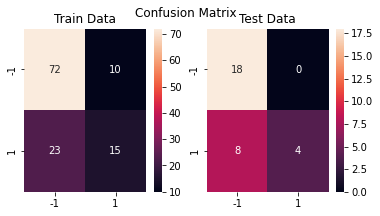

In [ ]:
#Plotting the confusion matrix for better interpretation
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=2, figsize=(6, 3))
ax1, ax2 = axes
sns.heatmap(cm_train, annot=True, fmt='g', ax=ax1)
sns.heatmap(cm_test, annot=True, fmt='g', ax=ax2)
ax1.set_title('Train Data')
ax1.xaxis.set_ticklabels(['-1', '1'])
ax1.yaxis.set_ticklabels(['-1', '1'])
ax2.set_title('Test Data')
ax2.xaxis.set_ticklabels(['-1', '1'])
ax2.yaxis.set_ticklabels(['-1', '1'])
fig.suptitle('Confusion Matrix')

In [ ]:
from sklearn.metrics import classification_report
train_cr = classification_report(train_label, predicted_train_labels)
print("Train Report:")
print(train_cr)
test_cr = classification_report(test_label, predicted_labels)
print("Test Report:")
print(test_cr)

Train Report:
              precision    recall  f1-score   support

        -1.0       0.76      0.88      0.81        82
         1.0       0.60      0.39      0.48        38

    accuracy                           0.73       120
   macro avg       0.68      0.64      0.64       120
weighted avg       0.71      0.72      0.71       120

Test Report:
              precision    recall  f1-score   support

        -1.0       0.69      1.00      0.82        18
         1.0       1.00      0.33      0.50        12

    accuracy                           0.73        30
   macro avg       0.85      0.67      0.66        30
weighted avg       0.82      0.73      0.69        30



In [ ]:
#Note that Iris data has three labels 0, 1 and 2. In the code above, 
#we have considered label 1 as class 1 and other two labels as class -1. 

#Exercise 1: 
#Now, modify the code so that label 0 is considered as class 1 and 
#other labels are considered as class -1.
#Consider the same setup as used in the code above,
#where we take first 80% as train data, and remaining 20% as test data 
#Train the svm using only the train features and labels. 
#Find the test set accuracy and train set accuracy and report them.

#Exercise 2: 
#Modify the code so that label 2 is considered as class 1 and 
#other labels are considered as class -1. 
#Consider the same setup as used in the code above,
#where we take first 80% as train data, and remaining 20% as test data 
#Train the decision tree using only the train features and labels. 
#Find the test accuracy and train accuracy and report them.